### 예제
1. csv 폴더에 있는 파일 4개 로드(tran_1, tran_2, tran_d_1, tran_d_2)
2. tran_1, tran_2 단순하게 행을 추가 결합 (tran)
3. tran_d_1, tran_d_2 단순하게 행을 추가 결합 (tran_d)
4. 2번, 3번 과정에서 결합한 데이터프레임을 특정 조건에 맞춰서 left(tran)를 열 결합 (transaction)

In [48]:
import pandas as pd

In [49]:
tran_1 = pd.read_csv('../csv/tran_1.csv')
tran_2 = pd.read_csv('../csv/tran_2.csv')
tran_d_1 = pd.read_csv('../csv/tran_d_1.csv')
tran_d_2 = pd.read_csv('../csv/tran_d_2.csv')



In [50]:
tran = pd.concat([tran_1, tran_2],axis=0,ignore_index=True)
tran.head(1)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502


In [51]:
tran_d = pd.concat([tran_d_1, tran_d_2],axis=0,ignore_index=True)
tran_d.head(1)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1


In [52]:
transaction = pd.merge(tran, tran_d, on = 'transaction_id', how = 'left')
transaction

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2
...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1


### 데이터 결합 2
1. 파일 로드 (customer_master, item_master)
2. 2개의 데이터 프레임을 transaction에 조건에 맞게 조인 결합
3. 결합이 된 데이터프레임에서 quantity 컬럼과 item_price 컬럼을 가지고 total_price 새로운 컬럼 추가(quantity * item_price)
4. payment_date 컬럼을 시계열 데이터로 변경

In [53]:
import pandas as pd

In [54]:
customer_master = pd.read_csv('../csv/customer_master.csv')
item_master = pd.read_csv('../csv/item_master.csv')

In [55]:
customer_master.head(1)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0


In [56]:
item_master.head(1)

,item_id,item_name,item_price
0,S001,PC-A,50000


In [57]:
join_data = pd.merge(transaction, customer_master, on = 'customer_id', how = 'left')
join_data.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0


In [58]:
total_df = pd.merge(join_data, item_master, on = 'item_id', how = 'left')
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000


In [59]:
total_df['total_price'] = total_df['quantity'] * total_df['item_price']
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000


In [60]:
total_df['payment_date'] = pd.to_datetime(total_df['payment_date'], format = '%Y-%m-%d %H:%M:%S')
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000


In [61]:
# 시계열 데이터에서 년도-월 부분만 따로 추춘 -> payment_month 컬럼 생성
total_df['payment_month'] = total_df['payment_date'].dt.strftime("%Y-%m")

## 그룹화 예제
1. payment_month를 기준으로 그룹화
2. total_price의 합계, price의 합계를 출력
3. 2개의 합계를 matplotlib을 이용하여 라인그래프로 시각화

In [62]:
# 그룹화

# case 1
group_data = total_df.groupby("payment_month").sum()[['price', 'total_price']]

# case 2
group_data = total_df.groupby("payment_month").sum().loc[:,['price', 'total_price']]

# case 3
group_data = total_df.groupby("payment_month").sum().iloc[:,[0, 5]]

C:\Users\ezen\AppData\Local\Temp\ipykernel_11672\301943494.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = total_df.groupby("payment_month").sum()[['price', 'total_price']]
C:\Users\ezen\AppData\Local\Temp\ipykernel_11672\301943494.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = total_df.groupby("payment_month").sum().loc[:,['price', 'total_price']]
C:\Users\ezen\AppData\Local\Temp\ipykernel_11672\301943494.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify nume

In [63]:
!pip install matplotlib
!pip install numpy


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import matplotlib.pyplot as plt

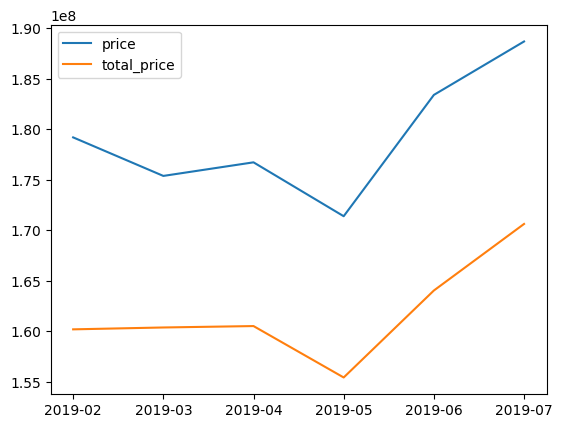

In [65]:
plt.plot(group_data, label = group_data.columns)
plt.legend()
plt.show()

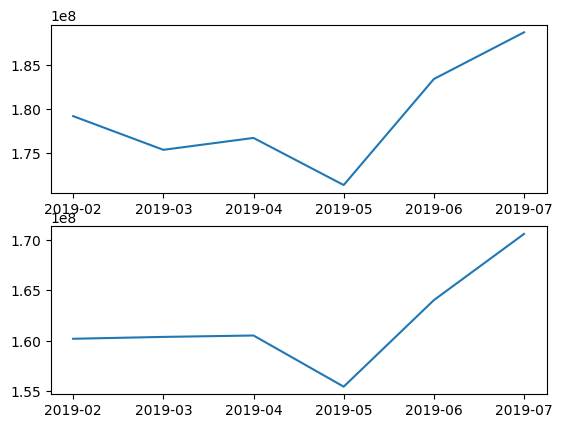

In [66]:
# 라인 그래프 시각화
# subplot을 이용하여 그래프를 2개 생성
plt.subplot(2, 1, 1) # plt.subplot(그래프 행의 갯수, 그래프 열의 갯수, 그 중 몇번에 그래프인지)
plt.plot(group_data['price'])
plt.subplot(2, 1, 2)
plt.plot(group_data['total_price'])
plt.show()

### apply()
1. 스리즈 형태의 데이터에서 각 항목들을 하나씩 함수에 대입하여 결과값을 스리즈의 형태로 리턴 함수
2. apply(일반함수), apply(lamda함수)

### 예제 3
1. total_df에서 gender 컬럼의 값들의 데이터를 확인
2. M, F, NaN 데이터가 있는 것을 확인
3. M은 남자, F는 여자, NaN는 무응답으로 데이터를 변경(apply 사용)

In [67]:
total_df['gender']

0         M
1         M
2         F
3         M
4         M
       ... 
7139    NaN
7140      M
7141      F
7142    NaN
7143      M
Name: gender, Length: 7144, dtype: object

In [76]:
# 결츨치 확인
total_df['gender'].isna().sum()

1075

In [79]:
# 데이터의 분포
# total_df['gender'].unique() # 종류 확인
total_df['gender'].value_counts() # 종류별로 몇개의 데이터가 존재하는지 확인

M    3268
F    2801
Name: gender, dtype: int64

In [69]:
# gender 컬럼의 데이터를 m은 남자, f는 여자, nan은 무응답

# case 1(apply와 일반함수)
def change(x):
    if x == 'M':
        return '남자'
    elif x == 'F':
        return '여자'
    else:
        return '무응답'

total_df['gender'].apply(change)


0        남자
1        남자
2        여자
3        남자
4        남자
       ... 
7139    무응답
7140     남자
7141     여자
7142    무응답
7143     남자
Name: gender, Length: 7144, dtype: object

In [80]:
# case 2(apply, lambda 함수 사용)
total_df['gender'].apply(
    lambda y : '여자' if (y == 'F') else ('남자' if (y == 'M') else '무응답')
)

0        남자
1        남자
2        여자
3        남자
4        남자
       ... 
7139    무응답
7140     남자
7141     여자
7142    무응답
7143     남자
Name: gender, Length: 7144, dtype: object